<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/12%20dividend_yield_for_MOEX_and_SP500.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (12, 6)

import okama as ok

### Дивидендная доходность индекса

$TR_n$ - полная доходность индекса в день n
$I_n$ - ценовая доходность индекса в день n
$ID_n$ - полученные дивиденды

$$ TR_n = \frac{I_n + ID_n}{I_{n-1}} $$

Дивидендная доходность индекса это $ID_n / I_{n-1}$:
$$ \frac{ID_n}{I_{n-1}} = TR_n - (\frac{I_n}{I_{n-1}} - 1)$$
$I_n  / I_{n-1} - 1$ - ценовая доходность

# Функция рисования столбчатой диаграммы дивидендной доходности

In [ ]:
def plot_dividend_yield(first_year: str,
                        last_year: str,
                        title: str,
                        df_price: pd.DataFrame,
                        df_div: pd.DataFrame,
                        infl: pd.Series):
    bar_width = 300  # ширина столбца диаграммы
    x_axis = df_price[str(first_year): str(last_year)].index.to_timestamp()

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    # бары ценовой доходности
    ax.bar(x_axis, df_price[first_year: last_year] * 100, width=bar_width, label='Ценовая доходность')
    # бары дивидендной доходности
    ax.bar(x_axis, df_div[first_year: last_year] * 100, width=bar_width, label='Дивидндная доходность')
    # линия инфляции
    ax.plot(x_axis, infl[str(first_year): str(last_year)].values, linestyle='dashed', color='black', label='Инфляция')
    # ось Х в положении y=0
    ax.axhline(y=0, linewidth=0.7, color='k', label='_nolegend_')

    ax.margins(0.02)

    # регулирования надписей оси Х
    years = mdates.YearLocator()  # ежегодный формат
    years_fmt = mdates.DateFormatter('%Y')
    # назначение формата надписей
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    # Титул графика и легенда
    ax.legend()
    ax.set_title(title)
    ax.set_ylabel('Доходность, %')

# Дивидендная доходность индекса Мосбиржи

In [ ]:
ls = ['IMOEX.INDX', 'MCFTR.INDX']
moex = ok.AssetList(ls, ccy='RUB', first_date='2000-01', last_date='2021-12')
moex

In [ ]:
df_price = moex.annual_return_ts.iloc[:, 0]  # ценовая доходность, приведенная к году

In [ ]:
df = moex.assets_ror

In [ ]:
df['div'] = df['MCFTR.INDX'] - df['IMOEX.INDX']  # создаем еще один столбец с месячной дивидендной доходностью
df

In [ ]:
df_div = df['div'].resample('A').apply(lambda x: np.prod(x + 1.) - 1)  # годовые значения дивидендной доходности

In [ ]:
div_results = df_div['2010':'2021'] * 100
div_results.mean()

In [ ]:
price_results = df_price['2010':'2021'] * 100
price_results.mean()

In [34]:
div_results.mean() / (price_results.mean() + div_results.mean())  # Доля дивидендной доходности в полной доходности

0.3350498875389524

In [ ]:
infl_RUB = ok.Inflation('RUB.INFL')

In [ ]:
annual_infl = infl_RUB.annual_inflation_ts['2010':'2021'] * 100
annual_infl.mean()

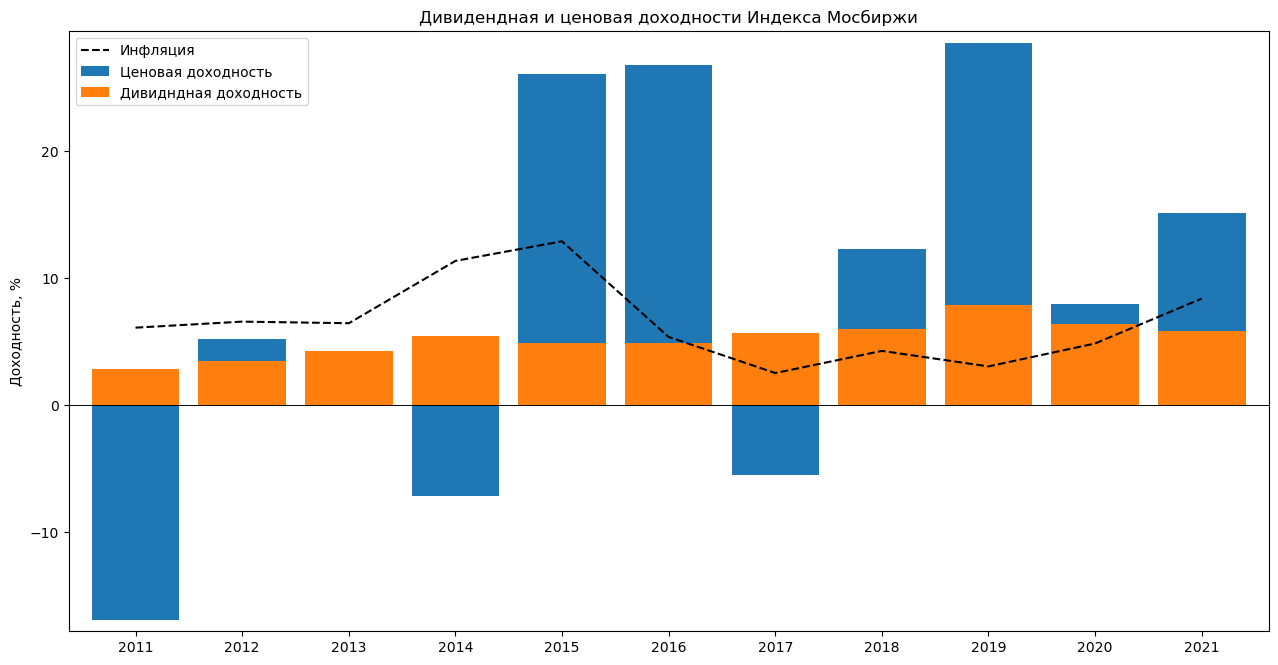

In [32]:
plot_dividend_yield('2011', '2021', 'Дивидендная и ценовая доходности Индекса Мосбиржи',df_price, df_div, annual_infl)

## Дивидендная доходность S&P 500

In [ ]:
ls = ['GSPC.INDX', 'SP500TR.INDX']
sp = ok.AssetList(ls, ccy='USD', first_date='2011-01', last_date='2021-12')

In [ ]:
df_price_sp = sp.annual_return_ts.iloc[:, 0]

In [ ]:
df_sp = sp.assets_ror

In [ ]:
df_sp['div'] = df_sp.iloc[:, 1] - df_sp.iloc[:, 0]

In [ ]:
df_div_sp = df_sp['div'].resample('A').apply(lambda x: np.prod(x + 1.) - 1)

In [ ]:
div_results_sp = df_div_sp['2011':'2021']*100
div_results_sp.mean()

In [ ]:
price_results_sp = df_price_sp['2011':'2021'] * 100
price_results_sp.mean()

In [ ]:
infl_USD = ok.Inflation('USD.INFL').annual_inflation_ts['2010':'2021'] * 100
infl_USD.mean()

In [ ]:
div_results_sp.mean() / (price_results_sp.mean() + div_results_sp.mean())

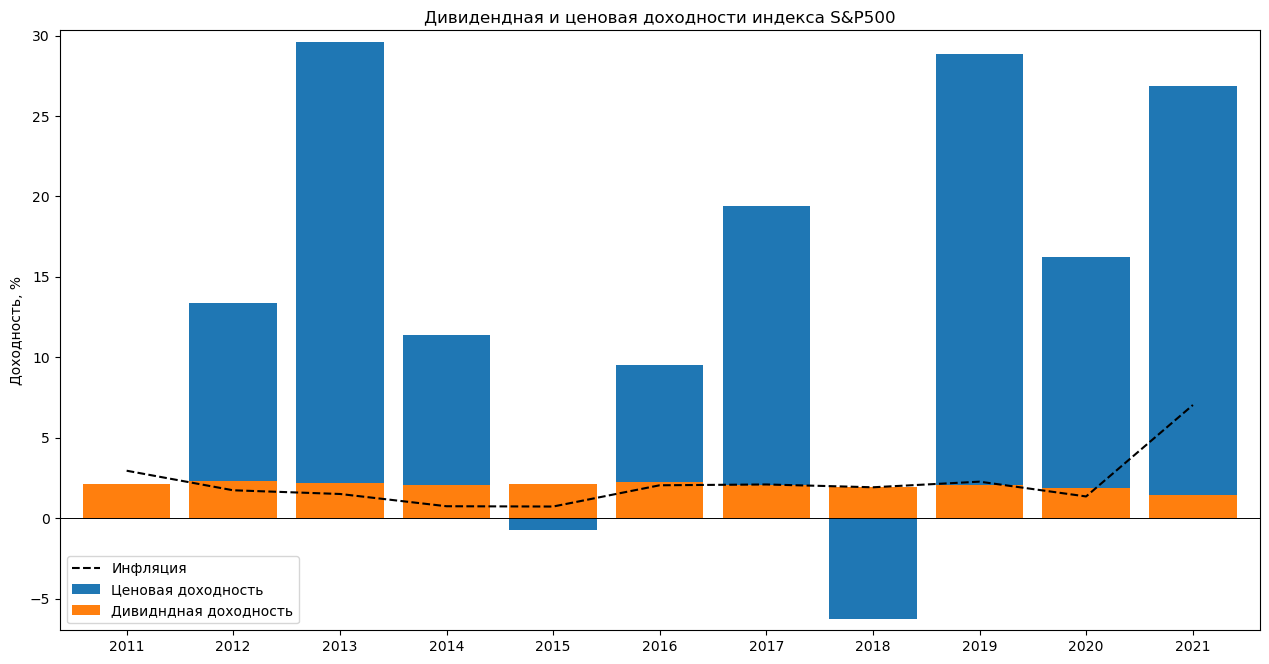

In [33]:
plot_dividend_yield('2011', '2021', 'Дивидендная и ценовая доходности индекса S&P500', df_price_sp, df_div_sp, infl_USD)
